<a href="https://colab.research.google.com/github/bchirabenyoussef-hash/Ola-Bike-Ride-Request-Demand-Forecast/blob/main/Olabike_01.final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Loading and Exploring Data

In [1]:
import pandas as pd
import numpy as np

# Load the dataset
df = pd.read_csv('ola.csv')

# Basic exploration
print(df.head())
print(df.info())
print(df.describe())
print(df.shape)

              datetime  season  weather   temp  humidity  windspeed  casual  \
0  2011-01-01 00:00:00       3        2   6.66     76.62       9.57       5   
1  2011-01-01 01:00:00       4        3  13.54     55.91       4.01      36   
2  2011-01-01 02:00:00       1        3  29.58     20.97      33.61      34   
3  2011-01-01 03:00:00       3        1   7.40     61.64      15.85       6   
4  2011-01-01 04:00:00       3        4  30.66     98.71      11.47      14   

   registered  count  
0         128    133  
1         184    220  
2          97    131  
3          47     53  
4         199    213  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   weather     10886 non-null  int64  
 3   temp        10886 non-null  float64
 4   humidity    10886 non-null  

Common Data Cleaning Operations

In [2]:
# Convert datetime column to proper datetime format
df['datetime'] = pd.to_datetime(df['datetime'])

# Extract useful features from datetime
df['year'] = df['datetime'].dt.year
df['month'] = df['datetime'].dt.month
df['day'] = df['datetime'].dt.day
df['hour'] = df['datetime'].dt.hour
df['dayofweek'] = df['datetime'].dt.dayofweek

# Rename columns for clarity
df.rename(columns={'temp': 'temperature', 'count': 'total_count'}, inplace=True)

# Drop duplicates
df.drop_duplicates(inplace=True)

# Reset index after cleaning
df.reset_index(drop=True, inplace=True)

2. Visualization with Matplotlib and SeabornSetting Up Visualization Libraries

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)

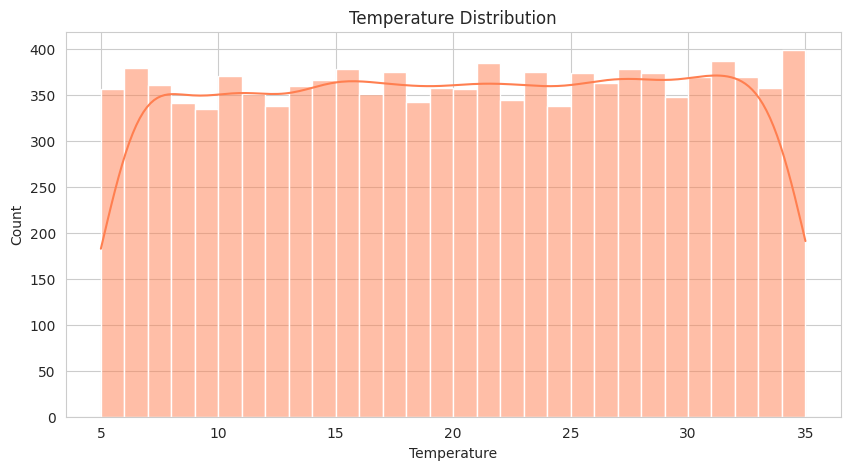

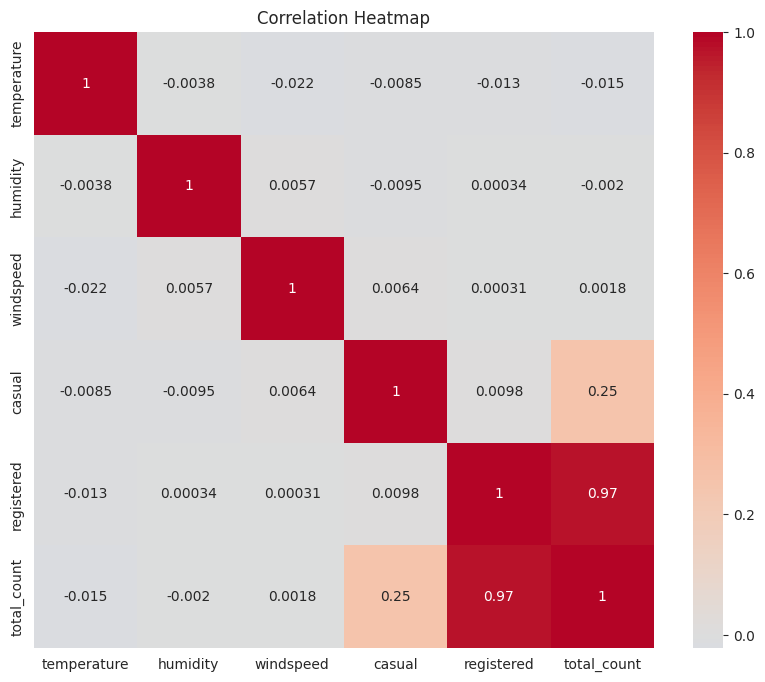

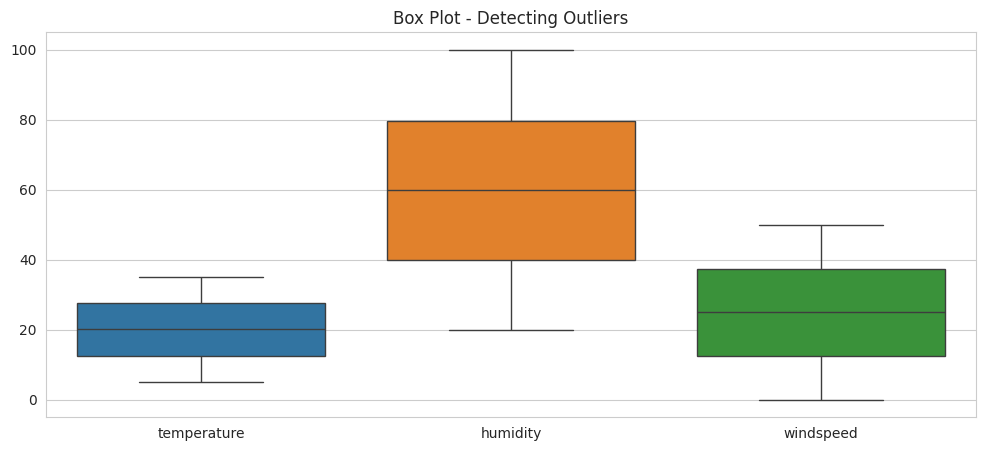

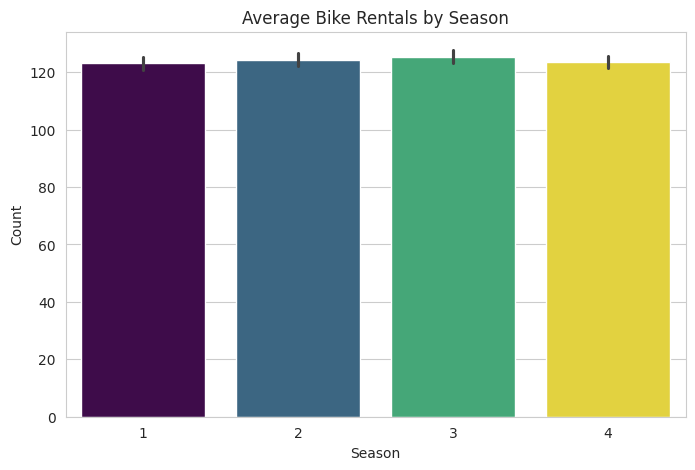

In [9]:
# Distribution of temperature
plt.figure(figsize=(10, 5))
sns.histplot(df['temperature'], kde=True, bins=30, color='coral')
plt.title('Temperature Distribution')
plt.xlabel('Temperature')
plt.show()

# Correlation heatmap
plt.figure(figsize=(10, 8))
correlation = df[['temperature', 'humidity', 'windspeed', 'casual', 'registered', 'total_count']].corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap')
plt.show()

# Box plot for outlier detection
plt.figure(figsize=(12, 5))
sns.boxplot(data=df[['temperature', 'humidity', 'windspeed']])
plt.title('Box Plot - Detecting Outliers')
plt.show()

# Count by season
plt.figure(figsize=(8, 5))
sns.barplot(x='season', y='total_count', data=df, palette='viridis', hue='season', legend=False)
plt.title('Average Bike Rentals by Season')
plt.xlabel('Season')
plt.ylabel('Count')
plt.show()

3. Handling Missing Values, Outliers, and AnomaliesIdentifying Missing Values

datetime       0
season         0
weather        0
temperature    0
humidity       0
windspeed      0
casual         0
registered     0
total_count    0
year           0
month          0
day            0
hour           0
dayofweek      0
dtype: int64
Total missing values: 0


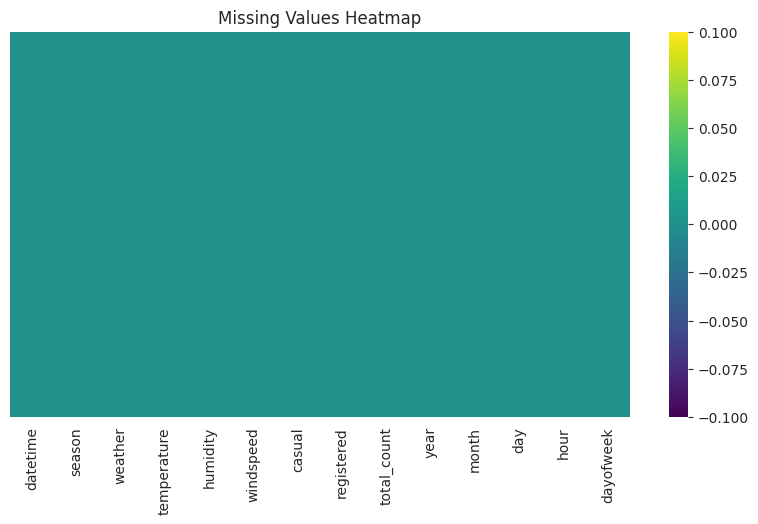

In [7]:
# Check for missing values
print(df.isnull().sum())
print(f"Total missing values: {df.isnull().sum().sum()}")

# Visualize missing values
plt.figure(figsize=(10, 5))
sns.heatmap(df.isnull(), cbar=True, yticklabels=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

Handling Missing Values

In [11]:
# Method 1: Drop rows with missing values
df_dropped = df.dropna()

# Method 2: Fill with mean/median/mode
df['temperature'] = df['temperature'].fillna(df['temperature'].mean())
df['humidity'] = df['humidity'].fillna(df['humidity'].median())
df['weather'] = df['weather'].fillna(df['weather'].mode()[0])

# Method 3: Forward/Backward fill (for time series)
df['temperature'] = df['temperature'].ffill()

# Method 4: Interpolation
df['temperature'] = df['temperature'].interpolate(method='linear')

Detecting and Handling Outliers

In [13]:
# Using IQR method
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Apply to windspeed (example from your data: 43.57 might be an outlier)
df_clean = remove_outliers_iqr(df, 'windspeed')

# Using Z-score method
from scipy import stats
z_scores = np.abs(stats.zscore(df[['temperature', 'humidity', 'windspeed']]))
df_no_outliers = df[(z_scores < 3).all(axis=1)]

4. Encoding Categorical Data

In [14]:
from sklearn.preprocessing import LabelEncoder

# For ordinal categorical data
le = LabelEncoder()
df['season_encoded'] = le.fit_transform(df['season'])
df['weather_encoded'] = le.fit_transform(df['weather'])

In [16]:
from sklearn.preprocessing import OneHotEncoder



#  Using sklearn OneHotEncoder
ohe = OneHotEncoder(sparse_output=False, drop='first')
encoded_features = ohe.fit_transform(df[['season', 'weather']])
encoded_df = pd.DataFrame(encoded_features, columns=ohe.get_feature_names_out())
df = pd.concat([df, encoded_df], axis=1)

Mapping for Custom Encoding

In [17]:
# Custom mapping for season (based on your data: 1, 2)
season_map = {1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'}
df['season_name'] = df['season'].map(season_map)

# Weather mapping
weather_map = {1: 'Clear', 2: 'Mist', 3: 'Light Rain', 4: 'Heavy Rain'}
df['weather_name'] = df['weather'].map(weather_map)

Second Phase

1. Feature Selection and Transformation for Demand Forecasting

In [18]:

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.feature_selection import SelectKBest, f_regression, RFE
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import warnings
warnings.filterwarnings('ignore')



Feature Engineering from DateTime

In [19]:
# Convert datetime to proper format
df['datetime'] = pd.to_datetime(df['datetime'])

# Extract time-based features (crucial for demand forecasting)
df['year'] = df['datetime'].dt.year
df['month'] = df['datetime'].dt.month
df['day'] = df['datetime'].dt.day
df['hour'] = df['datetime'].dt.hour
df['dayofweek'] = df['datetime'].dt.dayofweek
df['is_weekend'] = df['dayofweek'].apply(lambda x: 1 if x >= 5 else 0)

# Create time periods
df['time_period'] = pd.cut(df['hour'],
                           bins=[0, 6, 12, 18, 24],
                           labels=['Night', 'Morning', 'Afternoon', 'Evening'],
                           include_lowest=True)

# Cyclical encoding for hour and month (important for time series)
df['hour_sin'] = np.sin(2 * np.pi * df['hour'] / 24)
df['hour_cos'] = np.cos(2 * np.pi * df['hour'] / 24)
df['month_sin'] = np.sin(2 * np.pi * df['month'] / 12)
df['month_cos'] = np.cos(2 * np.pi * df['month'] / 12)

print("New features created!")
print(df.columns.tolist())

New features created!
['datetime', 'season', 'weather', 'temperature', 'humidity', 'windspeed', 'casual', 'registered', 'total_count', 'year', 'month', 'day', 'hour', 'dayofweek', 'season_encoded', 'weather_encoded', 'season_2', 'season_3', 'season_4', 'weather_2', 'weather_3', 'weather_4', 'season_name', 'weather_name', 'is_weekend', 'time_period', 'hour_sin', 'hour_cos', 'month_sin', 'month_cos']


Feature Selection Techniques

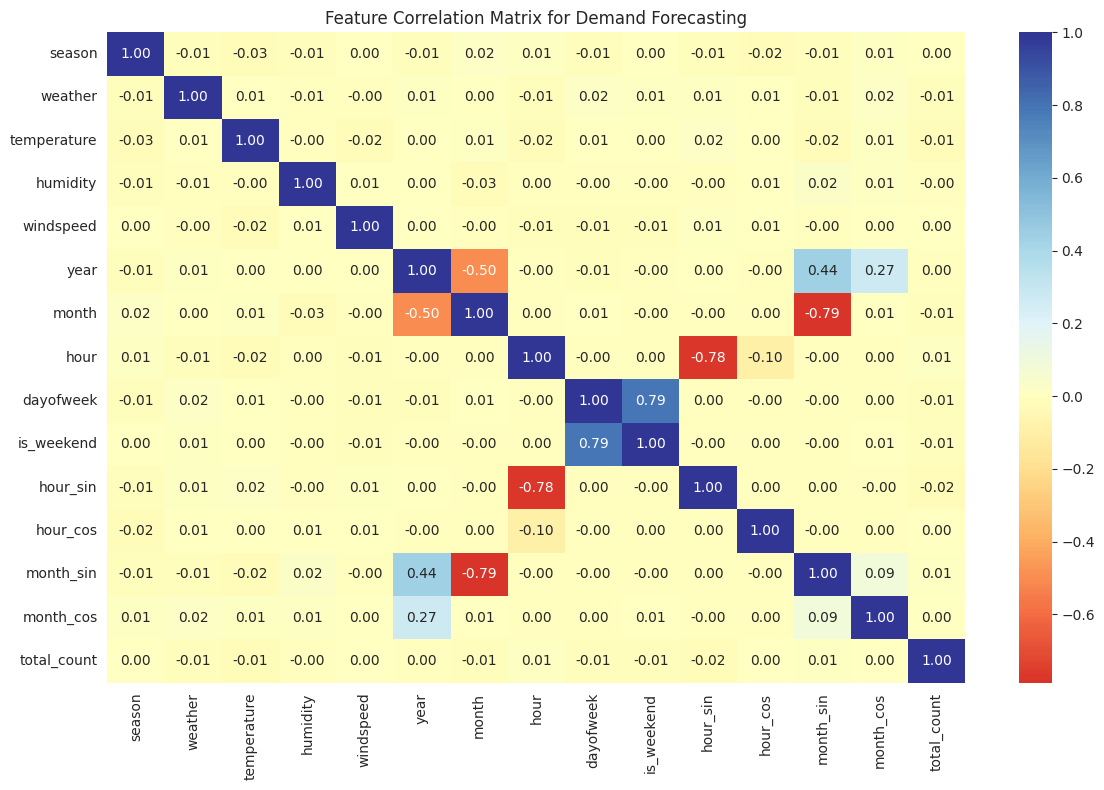


📊 Correlation with Target (total_count):
total_count    1.000000
month_sin      0.011859
hour           0.010032
season         0.004288
month_cos      0.004044
hour_cos       0.002660
windspeed      0.001845
year           0.000005
humidity      -0.001977
is_weekend    -0.005745
dayofweek     -0.007225
weather       -0.008348
month         -0.011086
temperature   -0.014635
hour_sin      -0.016671
Name: total_count, dtype: float64


In [21]:
# Prepare features (exclude target and leakage columns)
# Note: 'casual' and 'registered' sum to 'count', so exclude them to avoid data leakage
feature_cols = ['season', 'weather', 'temperature', 'humidity', 'windspeed',
                'year', 'month', 'hour', 'dayofweek', 'is_weekend',
                'hour_sin', 'hour_cos', 'month_sin', 'month_cos']

X = df[feature_cols]
y = df['total_count'] # Changed 'count' to 'total_count' based on previous rename

# Method 1: Correlation Analysis
plt.figure(figsize=(12, 8))
correlation_matrix = df[feature_cols + ['total_count']].corr() # Changed 'count' to 'total_count'
sns.heatmap(correlation_matrix, annot=True, cmap='RdYlBu', center=0, fmt='.2f')
plt.title('Feature Correlation Matrix for Demand Forecasting')
plt.tight_layout()
plt.show()

# Print correlations with target
print("\n📊 Correlation with Target (total_count):") # Changed 'count' to 'total_count'
print(correlation_matrix['total_count'].sort_values(ascending=False)) # Changed 'count' to 'total_count'

Feature Transformation

In [23]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardization (for Linear Regression, Lasso)
scaler_standard = StandardScaler()
X_train_scaled = scaler_standard.fit_transform(X_train)
X_test_scaled = scaler_standard.transform(X_test)

# Min-Max Scaling (alternative)
scaler_minmax = MinMaxScaler()
X_train_minmax = scaler_minmax.fit_transform(X_train)
X_test_minmax = scaler_minmax.transform(X_test)

print(f"Training set size: {X_train.shape}")
print(f"Test set size: {X_test.shape}")

Training set size: (8708, 14)
Test set size: (2178, 14)


Machine Learning Algorithms for Demand ForecastingModel Training and Comparison

In [24]:
# Dictionary to store results
results = {}

# ═══════════════════════════════════════════════════════════════
# 1. LINEAR REGRESSION
# ═══════════════════════════════════════════════════════════════
print("=" * 60)
print("📈 LINEAR REGRESSION")
print("=" * 60)

lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)
lr_pred = lr_model.predict(X_test_scaled)

# Feature coefficients
lr_coef = pd.DataFrame({
    'Feature': feature_cols,
    'Coefficient': lr_model.coef_
}).sort_values('Coefficient', key=abs, ascending=False)

print("\nFeature Coefficients:")
print(lr_coef)

results['Linear Regression'] = {
    'model': lr_model,
    'predictions': lr_pred
}

📈 LINEAR REGRESSION

Feature Coefficients:
        Feature  Coefficient
5          year    -1.355601
6         month    -1.090020
13    month_cos     0.929270
10     hour_sin    -0.887844
2   temperature    -0.660411
4     windspeed     0.482254
9    is_weekend    -0.342372
11     hour_cos    -0.304447
3      humidity    -0.287706
8     dayofweek    -0.255432
7          hour    -0.236499
12    month_sin     0.205613
1       weather     0.073916
0        season    -0.054966


In [25]:
# ═══════════════════════════════════════════════════════════════
# 2. LASSO REGRESSION (L1 Regularization)
# ═══════════════════════════════════════════════════════════════
print("\n" + "=" * 60)
print("📉 LASSO REGRESSION")
print("=" * 60)

# Test different alpha values
alphas = [0.01, 0.1, 1.0, 10.0, 100.0]
lasso_scores = []

for alpha in alphas:
    lasso = Lasso(alpha=alpha, random_state=42)
    scores = cross_val_score(lasso, X_train_scaled, y_train, cv=5, scoring='r2')
    lasso_scores.append({'alpha': alpha, 'mean_r2': scores.mean(), 'std': scores.std()})

lasso_df = pd.DataFrame(lasso_scores)
print("\nLasso Alpha Tuning:")
print(lasso_df)

# Best Lasso model
best_alpha = lasso_df.loc[lasso_df['mean_r2'].idxmax(), 'alpha']
lasso_model = Lasso(alpha=best_alpha, random_state=42)
lasso_model.fit(X_train_scaled, y_train)
lasso_pred = lasso_model.predict(X_test_scaled)

# Feature selection by Lasso (non-zero coefficients)
lasso_coef = pd.DataFrame({
    'Feature': feature_cols,
    'Coefficient': lasso_model.coef_
}).sort_values('Coefficient', key=abs, ascending=False)

print(f"\nBest Alpha: {best_alpha}")
print("\nLasso Coefficients (Feature Selection):")
print(lasso_coef)
print(f"\nFeatures eliminated: {(lasso_coef['Coefficient'] == 0).sum()}")

results['Lasso'] = {
    'model': lasso_model,
    'predictions': lasso_pred
}


📉 LASSO REGRESSION

Lasso Alpha Tuning:
    alpha   mean_r2       std
0    0.01 -0.004261  0.001122
1    0.10 -0.003524  0.000971
2    1.00 -0.000755  0.000337
3   10.00 -0.000673  0.000394
4  100.00 -0.000673  0.000394

Best Alpha: 10.0

Lasso Coefficients (Feature Selection):
        Feature  Coefficient
0        season         -0.0
1       weather          0.0
2   temperature         -0.0
3      humidity         -0.0
4     windspeed          0.0
5          year         -0.0
6         month         -0.0
7          hour          0.0
8     dayofweek         -0.0
9    is_weekend         -0.0
10     hour_sin         -0.0
11     hour_cos         -0.0
12    month_sin          0.0
13    month_cos          0.0

Features eliminated: 14



🌲 RANDOM FOREST REGRESSOR

Random Forest Feature Importance:
        Feature  Importance
3      humidity    0.192453
2   temperature    0.192010
4     windspeed    0.189332
8     dayofweek    0.057243
7          hour    0.051270
10     hour_sin    0.050886
11     hour_cos    0.049379
1       weather    0.043067
0        season    0.042442
6         month    0.039709
13    month_cos    0.037921
12    month_sin    0.037493
5          year    0.010923
9    is_weekend    0.005873


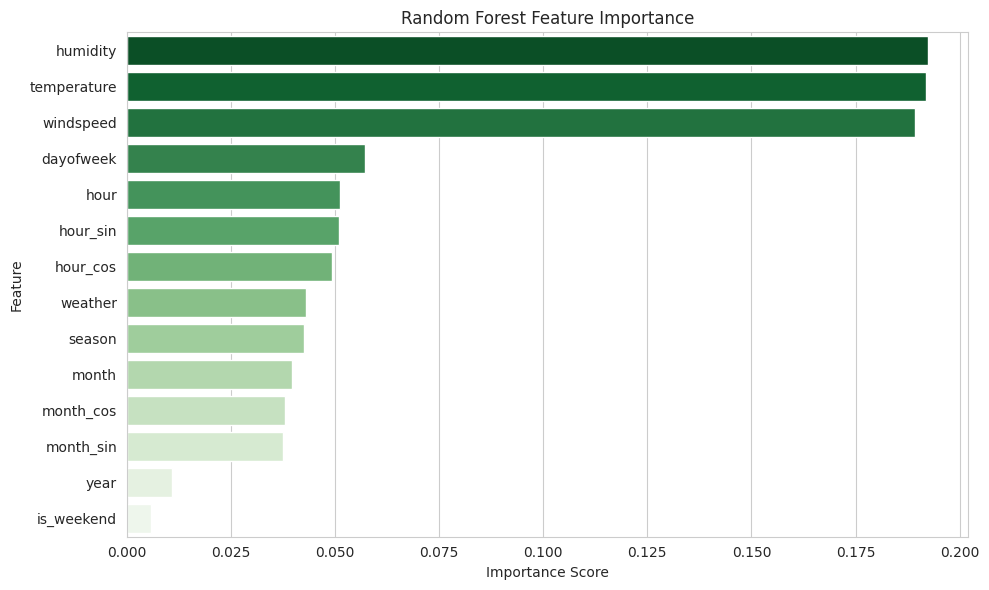

In [26]:
# ═══════════════════════════════════════════════════════════════
# 3. RANDOM FOREST REGRESSOR
# ═══════════════════════════════════════════════════════════════
print("\n" + "=" * 60)
print("🌲 RANDOM FOREST REGRESSOR")
print("=" * 60)

rf_model = RandomForestRegressor(
    n_estimators=100,
    max_depth=15,
    min_samples_split=5,
    min_samples_leaf=2,
    random_state=42,
    n_jobs=-1
)
rf_model.fit(X_train, y_train)  # No scaling needed for tree-based models
rf_pred = rf_model.predict(X_test)

# Feature importance
rf_importance = pd.DataFrame({
    'Feature': feature_cols,
    'Importance': rf_model.feature_importances_
}).sort_values('Importance', ascending=False)

print("\nRandom Forest Feature Importance:")
print(rf_importance)

# Visualize
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=rf_importance, palette='Greens_r')
plt.title('Random Forest Feature Importance')
plt.xlabel('Importance Score')
plt.tight_layout()
plt.show()

results['Random Forest'] = {
    'model': rf_model,
    'predictions': rf_pred
}

In [27]:
# ═══════════════════════════════════════════════════════════════
# 4. GRADIENT BOOSTING REGRESSOR
# ═══════════════════════════════════════════════════════════════
print("\n" + "=" * 60)
print("🚀 GRADIENT BOOSTING REGRESSOR")
print("=" * 60)

gb_model = GradientBoostingRegressor(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=5,
    min_samples_split=5,
    min_samples_leaf=2,
    random_state=42
)
gb_model.fit(X_train, y_train)
gb_pred = gb_model.predict(X_test)

# Feature importance
gb_importance = pd.DataFrame({
    'Feature': feature_cols,
    'Importance': gb_model.feature_importances_
}).sort_values('Importance', ascending=False)

print("\nGradient Boosting Feature Importance:")
print(gb_importance)

results['Gradient Boosting'] = {
    'model': gb_model,
    'predictions': gb_pred
}


🚀 GRADIENT BOOSTING REGRESSOR

Gradient Boosting Feature Importance:
        Feature  Importance
4     windspeed    0.237907
3      humidity    0.228224
2   temperature    0.192990
8     dayofweek    0.047245
10     hour_sin    0.044672
11     hour_cos    0.042964
7          hour    0.041867
12    month_sin    0.038090
1       weather    0.031097
13    month_cos    0.030715
6         month    0.027519
0        season    0.024627
5          year    0.008391
9    is_weekend    0.003692


In [28]:
# ═══════════════════════════════════════════════════════════════
# 5. XGBOOST REGRESSOR
# ═══════════════════════════════════════════════════════════════
print("\n" + "=" * 60)
print("⚡ XGBOOST REGRESSOR")
print("=" * 60)

xgb_model = XGBRegressor(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=6,
    min_child_weight=1,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    verbosity=0
)
xgb_model.fit(X_train, y_train)
xgb_pred = xgb_model.predict(X_test)

# Feature importance
xgb_importance = pd.DataFrame({
    'Feature': feature_cols,
    'Importance': xgb_model.feature_importances_
}).sort_values('Importance', ascending=False)

print("\nXGBoost Feature Importance:")
print(xgb_importance)

results['XGBoost'] = {
    'model': xgb_model,
    'predictions': xgb_pred
}


⚡ XGBOOST REGRESSOR

XGBoost Feature Importance:
        Feature  Importance
3      humidity    0.080554
2   temperature    0.080540
4     windspeed    0.077377
10     hour_sin    0.076978
8     dayofweek    0.076018
11     hour_cos    0.075337
6         month    0.073001
12    month_sin    0.072680
7          hour    0.072472
13    month_cos    0.072458
5          year    0.068792
9    is_weekend    0.061420
1       weather    0.058263
0        season    0.054111


Model Evaluation Techniques

Evaluation Metrics

In [29]:
# ═══════════════════════════════════════════════════════════════
# COMPREHENSIVE MODEL EVALUATION
# ═══════════════════════════════════════════════════════════════

def evaluate_model(y_true, y_pred, model_name):
    """Calculate multiple evaluation metrics"""
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)

    # MAPE (Mean Absolute Percentage Error)
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100

    return {
        'Model': model_name,
        'MSE': mse,
        'RMSE': rmse,
        'MAE': mae,
        'R² Score': r2,
        'MAPE (%)': mape
    }

# Evaluate all models
evaluation_results = []

# Linear Regression (uses scaled data)
evaluation_results.append(evaluate_model(y_test, results['Linear Regression']['predictions'], 'Linear Regression'))

# Lasso (uses scaled data)
evaluation_results.append(evaluate_model(y_test, results['Lasso']['predictions'], 'Lasso'))

# Random Forest
evaluation_results.append(evaluate_model(y_test, results['Random Forest']['predictions'], 'Random Forest'))

# Gradient Boosting
evaluation_results.append(evaluate_model(y_test, results['Gradient Boosting']['predictions'], 'Gradient Boosting'))

# XGBoost
evaluation_results.append(evaluate_model(y_test, results['XGBoost']['predictions'], 'XGBoost'))

# Create comparison dataframe
comparison_df = pd.DataFrame(evaluation_results)
comparison_df = comparison_df.round(4)
print("\n" + "=" * 80)
print("📊 MODEL COMPARISON - EVALUATION METRICS")
print("=" * 80)
print(comparison_df.to_string(index=False))


📊 MODEL COMPARISON - EVALUATION METRICS
            Model       MSE    RMSE     MAE  R² Score  MAPE (%)
Linear Regression 3414.2168 58.4313 49.8425   -0.0019   80.7241
            Lasso 3408.4874 58.3823 49.7520   -0.0003   80.7029
    Random Forest 3469.8369 58.9053 50.0392   -0.0183   80.8673
Gradient Boosting 3517.4883 59.3084 50.4251   -0.0323   80.6584
          XGBoost 3561.7166 59.6801 50.5084   -0.0452   81.3631


Cross-Validation with ELBOW Method


🔄 10-FOLD CROSS-VALIDATION RESULTS

Linear Regression:
  Mean R² Score: -0.0029 (+/- 0.0060)

Lasso:
  Mean R² Score: -0.0004 (+/- 0.0010)

Random Forest:
  Mean R² Score: -0.0465 (+/- 0.0173)

Gradient Boosting:
  Mean R² Score: -0.0182 (+/- 0.0152)

XGBoost:
  Mean R² Score: -0.1645 (+/- 0.0344)


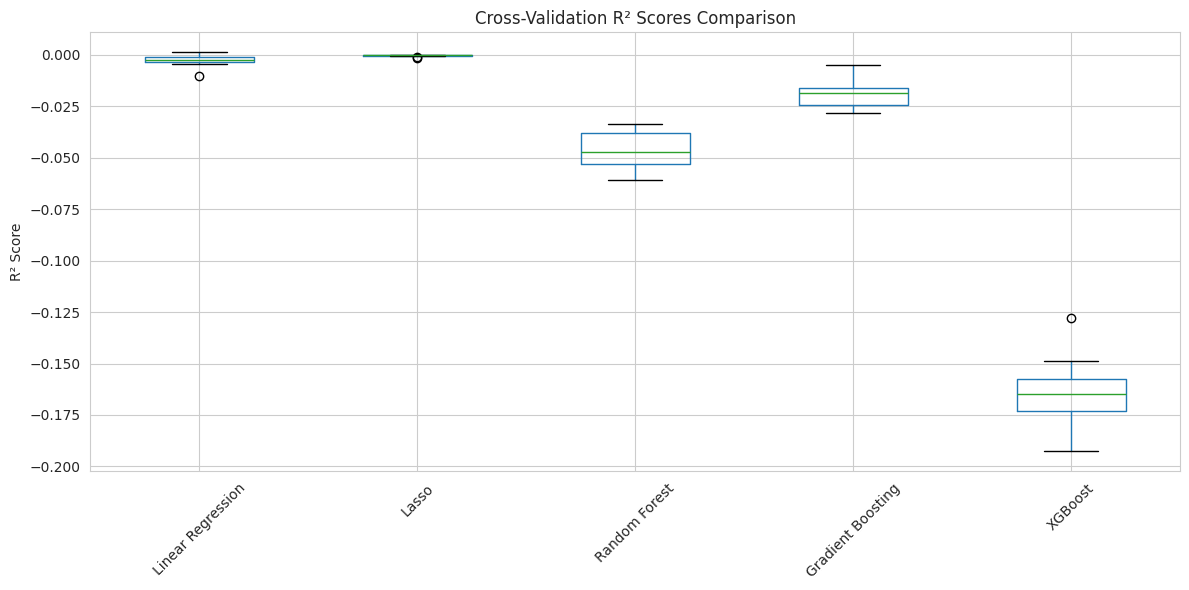

In [30]:
# ═══════════════════════════════════════════════════════════════
# CROSS-VALIDATION ANALYSIS
# ═══════════════════════════════════════════════════════════════

from sklearn.model_selection import cross_val_score, KFold

kfold = KFold(n_splits=10, shuffle=True, random_state=42)

cv_results = {}
models = {
    'Linear Regression': LinearRegression(),
    'Lasso': Lasso(alpha=best_alpha),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, random_state=42),
    'XGBoost': XGBRegressor(n_estimators=100, random_state=42, verbosity=0)
}

print("\n" + "=" * 60)
print("🔄 10-FOLD CROSS-VALIDATION RESULTS")
print("=" * 60)

for name, model in models.items():
    if name in ['Linear Regression', 'Lasso']:
        scores = cross_val_score(model, X_train_scaled, y_train, cv=kfold, scoring='r2')
    else:
        scores = cross_val_score(model, X_train, y_train, cv=kfold, scoring='r2')

    cv_results[name] = scores
    print(f"\n{name}:")
    print(f"  Mean R² Score: {scores.mean():.4f} (+/- {scores.std() * 2:.4f})")

# Visualize CV results
plt.figure(figsize=(12, 6))
cv_df = pd.DataFrame(cv_results)
cv_df.boxplot()
plt.title('Cross-Validation R² Scores Comparison')
plt.ylabel('R² Score')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Elbow Method for Hyperparameter Tuning


📐 ELBOW METHOD - RANDOM FOREST (n_estimators)
n_estimators=10: MSE = 4075.2849
n_estimators=25: MSE = 3836.4523
n_estimators=50: MSE = 3749.0026
n_estimators=75: MSE = 3725.4036
n_estimators=100: MSE = 3720.5067
n_estimators=150: MSE = 3711.8017
n_estimators=200: MSE = 3710.2273
n_estimators=250: MSE = 3703.2645
n_estimators=300: MSE = 3702.7059


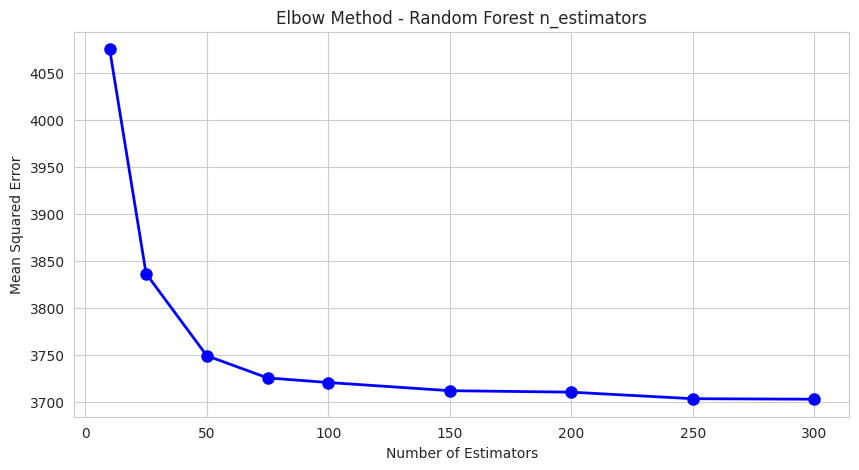

In [31]:
# ═══════════════════════════════════════════════════════════════
# ELBOW METHOD - Finding Optimal Parameters
# ═══════════════════════════════════════════════════════════════

# Elbow for Random Forest (n_estimators)
print("\n" + "=" * 60)
print("📐 ELBOW METHOD - RANDOM FOREST (n_estimators)")
print("=" * 60)

n_estimators_range = [10, 25, 50, 75, 100, 150, 200, 250, 300]
rf_scores = []

for n in n_estimators_range:
    rf = RandomForestRegressor(n_estimators=n, random_state=42, n_jobs=-1)
    scores = cross_val_score(rf, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
    rf_scores.append(-scores.mean())
    print(f"n_estimators={n}: MSE = {-scores.mean():.4f}")

plt.figure(figsize=(10, 5))
plt.plot(n_estimators_range, rf_scores, 'bo-', linewidth=2, markersize=8)
plt.xlabel('Number of Estimators')
plt.ylabel('Mean Squared Error')
plt.title('Elbow Method - Random Forest n_estimators')
plt.grid(True)
plt.show()


📐 ELBOW METHOD - XGBOOST (max_depth)
max_depth=2: MSE = 3657.9444
max_depth=3: MSE = 3767.2158
max_depth=4: MSE = 3900.6575
max_depth=5: MSE = 4087.2427
max_depth=6: MSE = 4255.7885
max_depth=7: MSE = 4358.1499
max_depth=8: MSE = 4408.8645
max_depth=9: MSE = 4478.7238
max_depth=10: MSE = 4430.9363
max_depth=12: MSE = 4312.7363
max_depth=15: MSE = 4334.7512


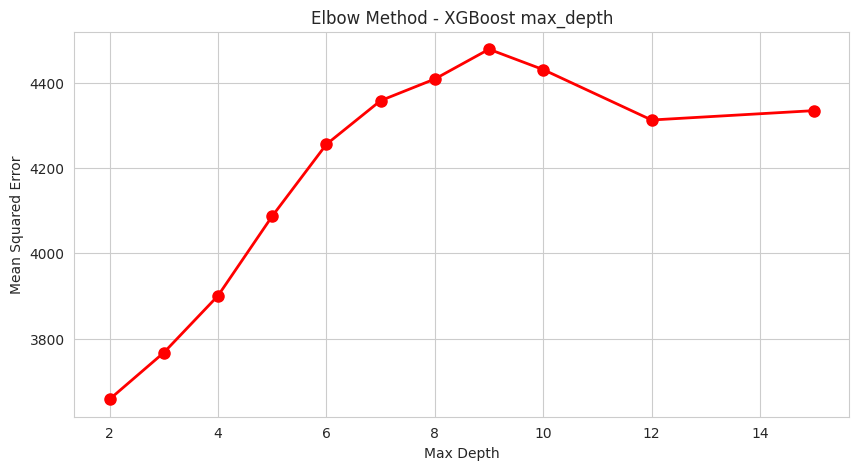

In [32]:
# Elbow for XGBoost (max_depth)
print("\n" + "=" * 60)
print("📐 ELBOW METHOD - XGBOOST (max_depth)")
print("=" * 60)

max_depth_range = [2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 15]
xgb_scores = []

for depth in max_depth_range:
    xgb = XGBRegressor(n_estimators=100, max_depth=depth, random_state=42, verbosity=0)
    scores = cross_val_score(xgb, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
    xgb_scores.append(-scores.mean())
    print(f"max_depth={depth}: MSE = {-scores.mean():.4f}")

plt.figure(figsize=(10, 5))
plt.plot(max_depth_range, xgb_scores, 'ro-', linewidth=2, markersize=8)
plt.xlabel('Max Depth')
plt.ylabel('Mean Squared Error')
plt.title('Elbow Method - XGBoost max_depth')
plt.grid(True)
plt.show()


📐 ELBOW METHOD - LASSO (alpha)


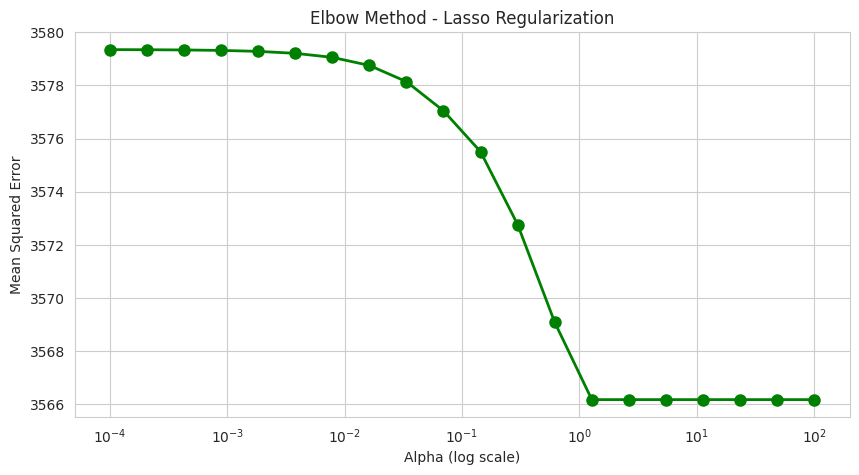

In [33]:
# Elbow for Lasso (alpha)
print("\n" + "=" * 60)
print("📐 ELBOW METHOD - LASSO (alpha)")
print("=" * 60)

alpha_range = np.logspace(-4, 2, 20)
lasso_mse = []

for alpha in alpha_range:
    lasso = Lasso(alpha=alpha, random_state=42)
    scores = cross_val_score(lasso, X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error')
    lasso_mse.append(-scores.mean())

plt.figure(figsize=(10, 5))
plt.semilogx(alpha_range, lasso_mse, 'go-', linewidth=2, markersize=8)
plt.xlabel('Alpha (log scale)')
plt.ylabel('Mean Squared Error')
plt.title('Elbow Method - Lasso Regularization')
plt.grid(True)
plt.show()

Visualization of Predictions

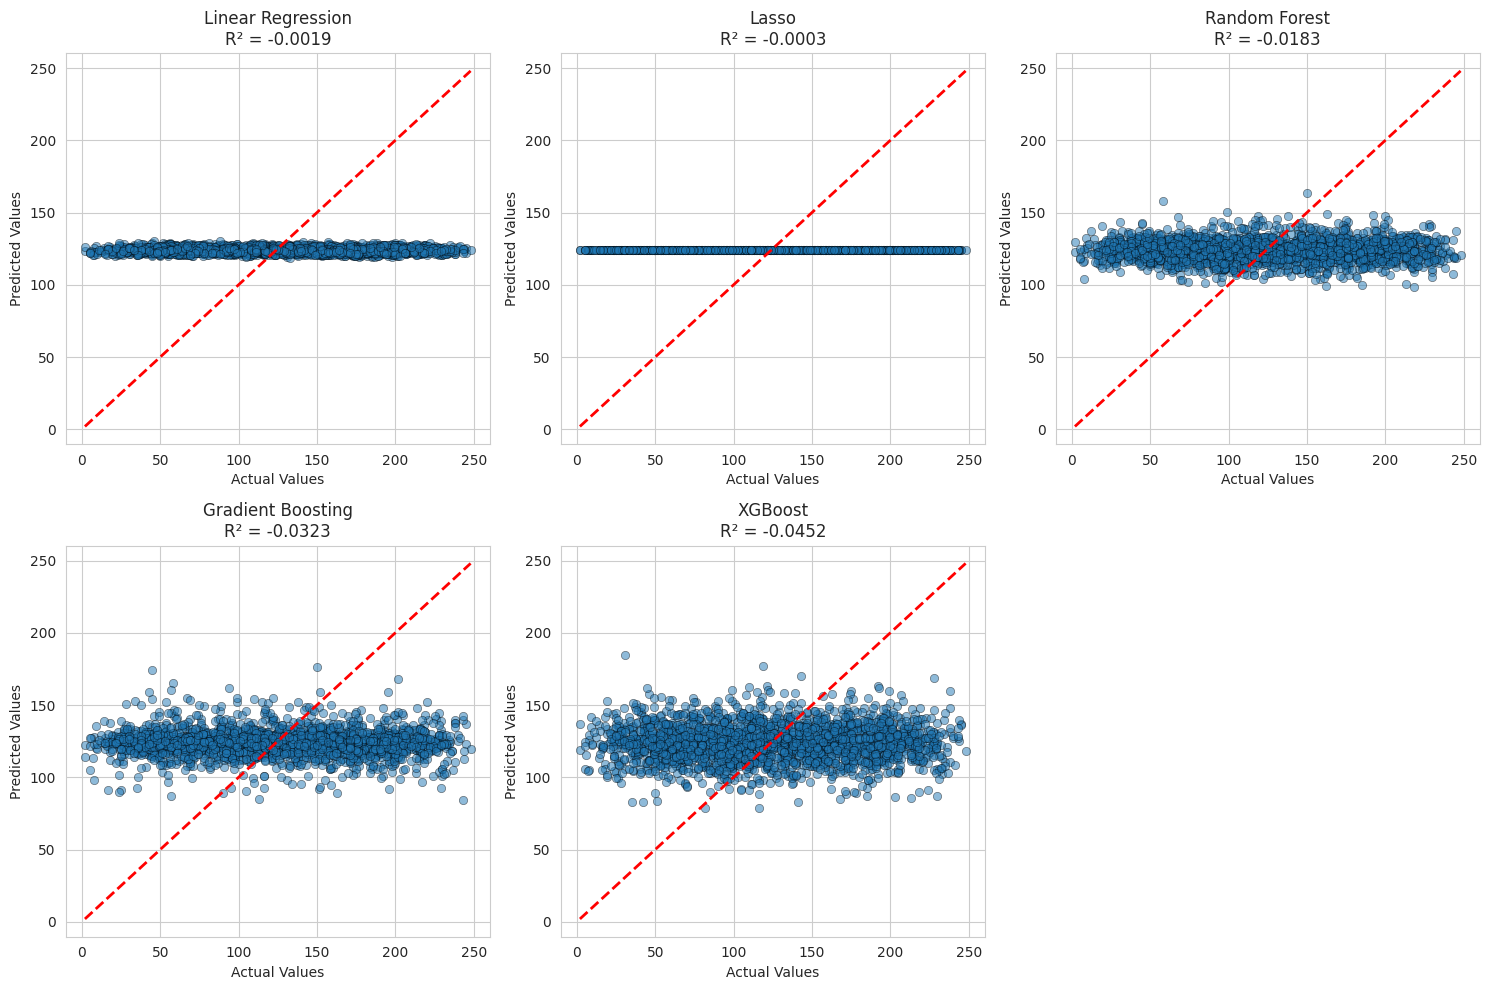

In [35]:
# ═══════════════════════════════════════════════════════════════
# PREDICTION VISUALIZATION
# ═══════════════════════════════════════════════════════════════

fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()

model_preds = {
    'Linear Regression': results['Linear Regression']['predictions'],
    'Lasso': results['Lasso']['predictions'],
    'Random Forest': results['Random Forest']['predictions'],
    'Gradient Boosting': results['Gradient Boosting']['predictions'],
    'XGBoost': results['XGBoost']['predictions']
}

for idx, (name, pred) in enumerate(model_preds.items()):
    axes[idx].scatter(y_test, pred, alpha=0.5, edgecolors='black', linewidth=0.5)
    axes[idx].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
    axes[idx].set_xlabel('Actual Values')
    axes[idx].set_ylabel('Predicted Values')
    axes[idx].set_title(f'{name}\nR² = {r2_score(y_test, pred):.4f}')

# Turn off the axis for the unused subplot (since we have 5 models and 6 subplots)
axes[5].axis('off')
plt.tight_layout()
plt.show()